# Locally weighted linear regression example

In this tutorial, we'll take a look at how LWLR can help us model highly nonlinear relationships between
variables.

Suppose we have an independent variable $x$ that is distributed as a Gaussian with mean of 10 and standard deviation of 5:

$$x \sim {\cal N}(10,5^2)$$

and suppose that the dependent variable $y$ is a sinusoid in $x$ corrupted by Gaussian noise:

$$y \sim {\cal N}(\sin(x/3.5), 0.2^2)$$

Below is some code to generate some sample data according to this distribution.

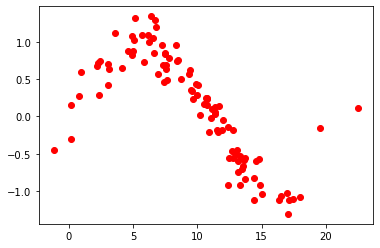

In [1]:
import numpy as np
import matplotlib.pyplot as plot

n = 100
x = np.random.normal(10, 5, [n,1])
y = np.sin(x/3.5) + np.random.normal(0,0.2, [n,1])

plot.plot(x,y,'ro')


OK, you should now implement LWLR with a Gaussian kernel. Experiment with different bandwidth hyperparameters.

<function matplotlib.pyplot.show(*args, **kw)>

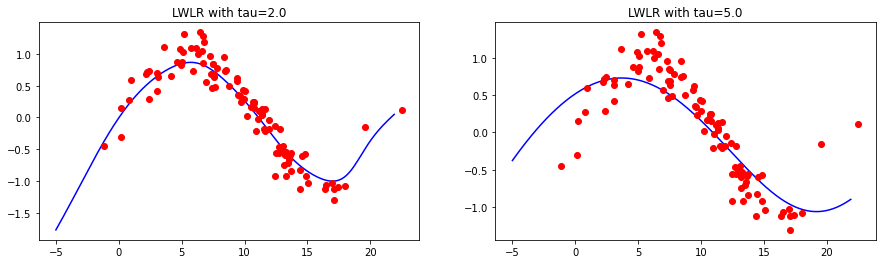

In [4]:
# h(x, X, y, tau) calculates a weight w^i for each training item
# in X, computes the optimal theta given those weights, and makes
# a prediction for x using that value of theta.

def h(x, X, y, tau):
    assert isinstance(x, (int, float))
    
    (m, n) = X.shape
    
    assert n == 1
    assert m >= 10
    assert X.shape == y.shape
    
    w = np.exp(-((x - X) * (x - X))/(2*tau*tau))
    
    assert (w.shape == (m, 1))
    
    W = np.diagflat(w)
    
    assert W.shape == (m,m)
    
    X = np.concatenate((np.ones((m,1)),X),1)
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    return np.array([[1, x]]) @ theta

# Test h() with a range of values and plot

plot.rcParams["figure.figsize"] = (15,4)

plot.subplot(121)
tau = 2.0
x_test = np.arange(-5,22,0.1)
y_test = np.zeros(x_test.shape)
for i in range(x_test.shape[0]):
    y_test[i] = h(x_test[i], x, y, tau)
plot.plot(x_test,y_test,'b-')
plot.plot(x, y, 'ro')
plot.title('LWLR with tau=2.0')

plot.subplot(122)
tau = 5.0
x_test = np.arange(-5,22,0.1)
y_test = np.zeros(x_test.shape)
for i in range(x_test.shape[0]):
    y_test[i] = h(x_test[i], x, y, tau)
plot.plot(x_test,y_test,'b-')
plot.plot(x, y, 'ro')
plot.title('LWLR with tau=5.0')

plot.show
